# Wine Project

### Index
1.  [Exploratory Data Analysis](#1)<br>
2.  [Selecting Features for Classification Models](#2)<br>
3.  [Building and Evaluating Supervised Classification Models](#3)<br>
4.  [Balancing Data with SMOTE](#4)<br>
5.  [Model Evaluation and Comparison](#5)<br>
6.  [Hyperparameter Tuning](#6)<br>
7.  [Final Model Selection](#7)<br>
8.  [Interpretation of Results](#8)<br>



</div>

## 1: Exploratory Data Analysis<a id="1"></a>


In [198]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [199]:
df_red = pd.read_csv('winequality-red.csv', sep=';', header=0).copy()
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [200]:
df_white = pd.read_csv('winequality-white.csv', sep=';', header=0).copy()
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [201]:
df_red.shape

(1599, 12)

In [202]:
df_white.shape

(4898, 12)

In [203]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [204]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [205]:
# Rename columns

df_red.rename(columns={
    'fixed acidity': 'fixed_acidity',
    'volatile acidity': 'volatile_acidity',
    'citric acid': 'citric_acid',
    'residual sugar': 'residual_sugar',
    'free sulfur dioxide': 'free_sulfur_dioxide',
    'total sulfur dioxide': 'total_sulfur_dioxide'
}, inplace=True)


In [206]:
df_red.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [207]:
# Rename columns

df_white.rename(columns={
    'fixed acidity': 'fixed_acidity',
    'volatile acidity': 'volatile_acidity',
    'citric acid': 'citric_acid',
    'residual sugar': 'residual_sugar',
    'free sulfur dioxide': 'free_sulfur_dioxide',
    'total sulfur dioxide': 'total_sulfur_dioxide'
}, inplace=True)

In [208]:
# Add column for wine type

df_red.loc[:, "type"] = "red"

df_white.loc[:, "type"] = "white"

In [209]:
df_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [210]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  type                  1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [211]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  type                  4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [212]:
df_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [213]:
df_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [214]:
df_red.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

In [215]:
df_white.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

In [216]:
df_red.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [217]:
df_white.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [218]:
df_red.duplicated().sum()

240

In [219]:
# check for duplicates 

red_duplicates = df_red.duplicated()

df_red_duplicates = df_red[red_duplicates]
df_red_duplicates


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,red
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5,red
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5,red
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,red
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,red
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,red
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5,red


In [220]:
df_red = df_red.drop_duplicates()

In [221]:
df_red.shape

(1359, 13)

In [222]:
df_white.duplicated().sum()

937

In [223]:
# check for duplicates 

white_duplicates = df_white.duplicated()

df_white_duplicates = df_white[white_duplicates]
df_white_duplicates.head(50).T

,4,5,7,8,20,39,48,61,63,74,75,88,89,90,99,104,106,108,114,118,131,141,152,156,159,160,163,191,199,201,212,217,220,222,228,229,234,235,236,252,257,265,270,288,289,290,302,305,321,322
fixed_acidity,7.2,8.1,7.0,6.3,6.2,7.3,7.0,6.0,6.6,6.7,7.4,7.1,7.1,7.2,6.0,7.4,7.1,7.1,6.7,7.2,6.5,7.1,6.9,7.4,5.2,6.1,7.4,6.8,6.8,7.1,7.0,5.8,7.5,6.2,6.4,7.1,7.2,7.2,7.2,6.9,6.3,6.9,6.9,7.2,7.2,7.2,6.1,7.3,6.6,6.8
volatile_acidity,0.23,0.28,0.27,0.3,0.66,0.24,0.31,0.19,0.38,0.23,0.24,0.43,0.44,0.39,0.34,0.25,0.12,0.23,0.41,0.31,0.24,0.37,0.25,0.24,0.44,0.32,0.24,0.28,0.26,0.32,0.16,0.26,0.27,0.25,0.17,0.24,0.23,0.23,0.23,0.4,0.35,0.29,0.32,0.23,0.23,0.23,0.41,0.41,0.24,0.25
citric_acid,0.32,0.4,0.36,0.34,0.48,0.39,0.26,0.26,0.15,0.31,0.29,0.61,0.62,0.63,0.66,0.37,0.32,0.35,0.34,0.5,0.32,0.67,0.3,0.42,0.04,0.24,0.42,0.4,0.24,0.24,0.32,0.24,0.36,0.25,0.32,0.41,0.38,0.38,0.38,0.56,0.3,0.4,0.26,0.39,0.39,0.39,0.0,0.24,0.35,0.34
residual_sugar,8.5,6.9,20.7,1.6,1.2,17.95,7.4,12.4,4.6,2.1,10.1,11.8,11.8,11.0,15.9,13.5,9.6,16.5,9.2,13.3,7.6,10.5,4.1,14.0,1.4,1.5,14.0,22.0,7.8,13.1,8.3,9.2,7.0,1.4,2.4,17.8,14.3,14.3,14.3,11.2,5.7,19.45,8.3,14.2,14.2,14.2,1.6,6.8,7.7,4.7
chlorides,0.058,0.05,0.045,0.049,0.029,0.057,0.069,0.048,0.044,0.046,0.05,0.045,0.044,0.044,0.046,0.06,0.054,0.04,0.049,0.056,0.038,0.045,0.054,0.066,0.036,0.036,0.066,0.048,0.052,0.05,0.045,0.044,0.036,0.03,0.048,0.046,0.058,0.058,0.058,0.043,0.035,0.043,0.053,0.058,0.058,0.058,0.063,0.057,0.031,0.031
free_sulfur_dioxide,47.0,30.0,45.0,14.0,29.0,45.0,28.0,50.0,25.0,30.0,21.0,54.0,52.0,55.0,26.0,52.0,64.0,60.0,29.0,68.0,48.0,49.0,23.0,48.0,43.0,38.0,48.0,48.0,54.0,52.0,38.0,55.0,45.0,35.0,41.0,39.0,55.0,55.0,55.0,40.0,8.0,36.0,32.0,49.0,49.0,49.0,36.0,41.0,36.0,34.0
total_sulfur_dioxide,186.0,97.0,170.0,132.0,75.0,149.0,160.0,147.0,78.0,96.0,105.0,155.0,152.0,156.0,164.0,192.0,162.0,171.0,150.0,195.0,203.0,155.0,116.0,198.0,119.0,124.0,198.0,167.0,214.0,204.0,126.0,152.0,164.0,105.0,200.0,145.0,194.0,194.0,194.0,142.0,97.0,156.0,180.0,192.0,192.0,192.0,87.0,163.0,135.0,134.0
density,0.9956,0.9951,1.001,0.994,0.9892,0.9999,0.9954,0.9972,0.9931,0.9926,0.9962,0.9974,0.9975,0.9974,0.9979,0.9975,0.9962,0.999,0.9968,0.9982,0.9958,0.9975,0.994,0.9979,0.9894,0.9898,0.9979,1.001,0.9961,0.998,0.9958,0.9961,0.9939,0.9912,0.9938,0.9998,0.9979,0.9979,0.9979,0.9975,0.9927,0.9996,0.9965,0.9979,0.9979,0.9979,0.9914,0.9949,0.9938,0.9927
pH,3.19,3.26,3.0,3.3,3.33,3.21,3.13,3.3,3.11,3.33,3.13,3.11,3.12,3.09,3.14,3.0,3.4,3.16,3.22,3.01,3.45,3.16,2.99,2.89,3.36,3.29,2.89,2.93,3.13,3.1,3.21,3.31,3.03,3.3,3.5,3.32,3.09,3.09,3.09,3.14,3.27,2.93,3.25,2.98,2.98,2.98,3.27,3.2,3.19,3.21
sulphates,0.4,0.44,0.45,0.49,0.39,0.36,0.46,0.36,0.38,0.64,0.35,0.45,0.46,0.44,0.5,0.44,0.41,0.59,0.51,0.47,0.54,0.44,0.38,0.42,0.33,0.42,0.42,0.5,0.47,0.49,0.34,0.38,0.33,0.44,0.5,0.39,0.44,0.44,0.44,0.46,0.41,0.47,0.51,0.48,0.48,0.48,0.67,0.41,0.37,0.38


In [224]:
df_white = df_white.drop_duplicates()

In [225]:
df_white.shape

(3961, 13)

In [226]:
df_red.describe(include= 'all')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1359
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252,NaN
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578,NaN
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,NaN
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,NaN
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000,NaN
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000,NaN


In [227]:
df_white.describe(include= 'all')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3961
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835,NaN
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683,NaN
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,NaN
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000,NaN
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000,NaN
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000,NaN


* Wide ranges and extrem max values appear for both types which means we have outliers for many features. 
* I will refer on check EU Laws to review the propable regulations and limits for the features.  
* Website: https://european-union.europa.eu/index_en
* Some features might also have higher or lower than standard values which may effect the quality and taste of wines but we will keep these records as long as they follow regulations.

* For Red Wines:

* Sulfur Dioxide (SO2): The maximum total sulfur dioxide limit is 150 mg/L. However, for red wines with a residual sugar content can increase up to 250 mg/L. 

* Volatile Acidity: It is not universally defined but the general threshold for volatile acidity (acetic acid) is around 1.2 g/L for red wines. Higher means, they can have spoilage or production issues.

* Rest of the Features can greatly influence red wine quality but they are not tightly regulated. 

* White Wines: 

* Maximum total sulfur dioxide limit is 200 mg/L.


#### Review the records which exceeds legal limits:

In [228]:
filtered_df = df_red[df_red['total_sulfur_dioxide'] > 250]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 1079 to 1081
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         2 non-null      float64
 1   volatile_acidity      2 non-null      float64
 2   citric_acid           2 non-null      float64
 3   residual_sugar        2 non-null      float64
 4   chlorides             2 non-null      float64
 5   free_sulfur_dioxide   2 non-null      float64
 6   total_sulfur_dioxide  2 non-null      float64
 7   density               2 non-null      float64
 8   pH                    2 non-null      float64
 9   sulphates             2 non-null      float64
 10  alcohol               2 non-null      float64
 11  quality               2 non-null      int64  
 12  type                  2 non-null      object 
dtypes: float64(11), int64(1), object(1)
memory usage: 224.0+ bytes


In [229]:
df_red['quality'].mean()

5.6232523914643116

In [230]:
filtered_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
1079,7.9,0.3,0.68,8.3,0.05,37.5,278.0,0.99316,3.01,0.51,12.3,7,red
1081,7.9,0.3,0.68,8.3,0.05,37.5,289.0,0.99316,3.01,0.51,12.3,7,red


* There are only these 2 entries. I would expect smaller values in quality as over 250 mg/L total_sulfur_dioxide may cause spoilage but both have 7 which is above average 5.6. 

In [231]:
filtered_df = df_white[df_white['total_sulfur_dioxide'] > 150]
filtered_df.head(20).T

,0,3,14,18,23,25,34,40,41,42,43,44,45,46,47,50,55,56,62,67
fixed_acidity,7.0,7.2,8.3,7.4,7.6,7.0,5.8,6.7,6.7,7.0,6.6,6.7,7.4,6.2,6.2,7.2,6.9,7.2,7.0,6.7
volatile_acidity,0.27,0.23,0.42,0.34,0.67,0.25,0.27,0.23,0.24,0.31,0.24,0.23,0.18,0.45,0.46,0.19,0.25,0.21,0.47,0.25
citric_acid,0.36,0.32,0.62,0.42,0.14,0.32,0.2,0.39,0.39,0.26,0.27,0.26,0.31,0.26,0.25,0.31,0.35,0.34,0.07,0.13
residual_sugar,20.7,8.5,19.25,1.1,1.5,9.0,14.95,2.5,2.9,7.4,1.4,1.4,1.4,4.4,4.4,1.6,1.3,11.9,1.1,1.2
chlorides,0.045,0.058,0.04,0.033,0.074,0.046,0.044,0.172,0.173,0.069,0.057,0.06,0.058,0.063,0.066,0.062,0.039,0.043,0.035,0.041
free_sulfur_dioxide,45.0,47.0,41.0,17.0,25.0,56.0,22.0,63.0,63.0,28.0,33.0,33.0,38.0,63.0,62.0,31.0,29.0,37.0,17.0,81.0
total_sulfur_dioxide,170.0,186.0,172.0,171.0,168.0,245.0,179.0,158.0,157.0,160.0,152.0,154.0,167.0,206.0,207.0,173.0,191.0,213.0,151.0,174.0
density,1.001,0.9956,1.0002,0.9917,0.9937,0.9955,0.9962,0.9937,0.9937,0.9954,0.9934,0.9934,0.9931,0.994,0.9939,0.9917,0.9908,0.9962,0.991,0.992
pH,3.0,3.19,2.98,3.12,3.05,3.25,3.37,3.11,3.1,3.13,3.22,3.24,3.16,3.27,3.25,3.35,3.13,3.09,3.02,3.14
sulphates,0.45,0.4,0.67,0.53,0.51,0.5,0.37,0.36,0.34,0.46,0.56,0.56,0.53,0.52,0.52,0.44,0.52,0.5,0.34,0.42


In [232]:
filtered_df['quality'].mean()

5.609893992932863

In [233]:
df_white['quality'].mean()

5.854834637717748

* For the white wines mean quality for the white wines which have total SO2 over 150 mg/L have almost same quality with the rest of the white wines. 
* I am keeping these records as I can"t confirm the regulations with busines owner but we will check more outliers in next steps.  

In [234]:
# As we will use a classification model, we will create a 'quality label' column to categorize the numerical values into categories. 
# Wines with a quality score of 3, 4, and 5 are low quality, score of 6 and 7 are medium quality, and score of 8 and 9 are high quality wines.

df_red['quality_label'] = df_red['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# transform labels into categorical data type 

df_red['quality_label'] = pd.Categorical(df_red['quality_label'],
categories=['low','medium','high'])

# Do the same for df_white df 

df_white['quality_label'] = df_white['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# transform labels into categorical data type 

df_white['quality_label'] = pd.Categorical(df_white['quality_label'],
categories=['low','medium','high'])



C:\Users\User\AppData\Local\Temp\ipykernel_11704\3068713873.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red['quality_label'] = df_red['quality'].apply(lambda value: 'low'
C:\Users\User\AppData\Local\Temp\ipykernel_11704\3068713873.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red['quality_label'] = pd.Categorical(df_red['quality_label'],
C:\Users\User\AppData\Local\Temp\ipykernel_11704\3068713873.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [235]:
df_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,low


In [236]:
df_white.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,low
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,medium
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white,medium


## 2: Selecting Features for Classification Models<a id="2"></a>

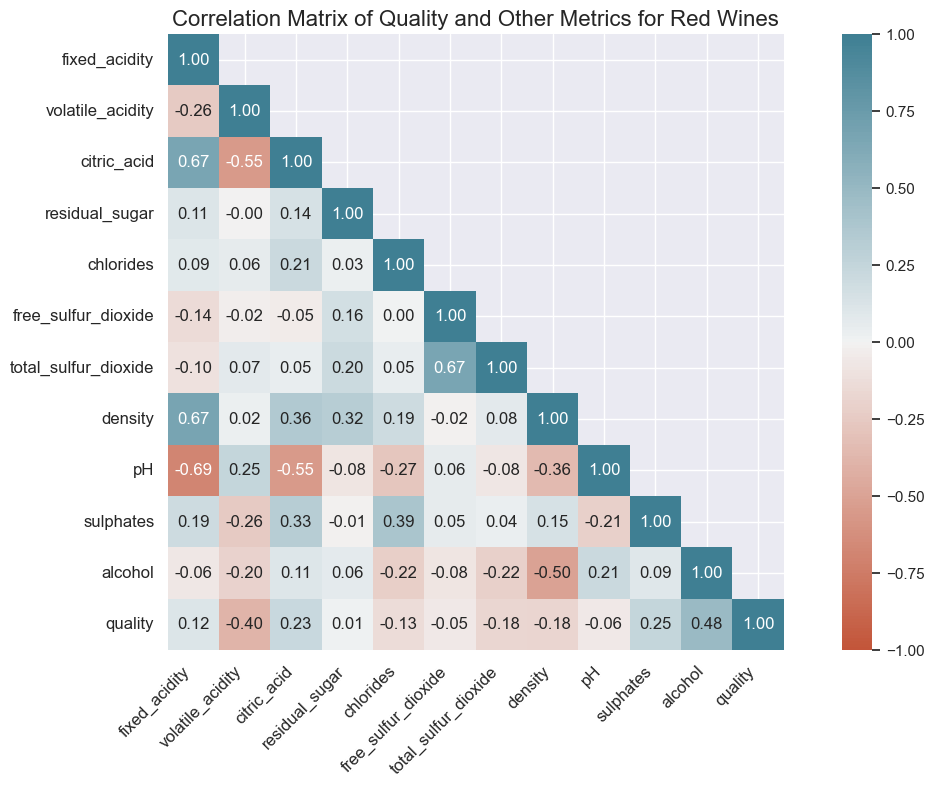

In [237]:
# create a heatmap to check relation between quality and all other metrics for red wines

# Compute the correlation matrix

corr = df_red.corr(numeric_only=True)

# Create a mask for the upper triangle

mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set the figure size and plot the heatmap with the mask

sns.set_theme(rc={'figure.figsize': (15, 8)})
ax = sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap=sns.diverging_palette(20, 220, n=200), square=True)

# Customize the tick labels and title

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Correlation Matrix of Quality and Other Metrics for Red Wines', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


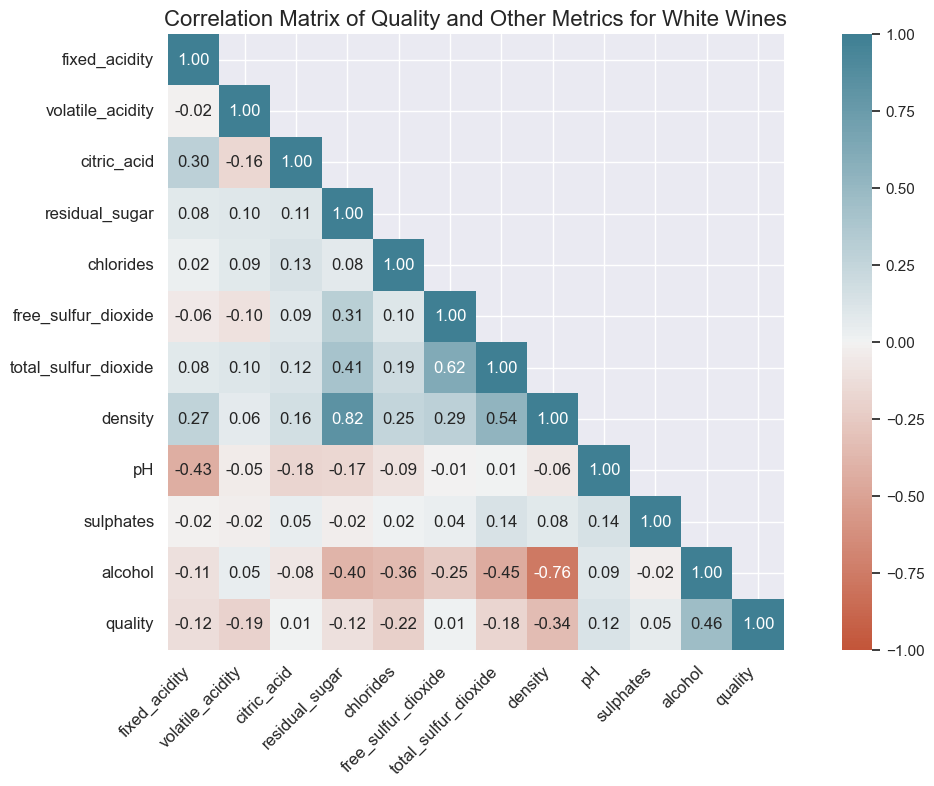

In [238]:
# create a heatmap to check relation between quality and all other metrics for white wines

# Compute the correlation matrix

corr = df_white.corr(numeric_only=True)

# Create a mask for the upper triangle

mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set the figure size and plot the heatmap with the mask

sns.set_theme(rc={'figure.figsize': (15, 8)})
ax = sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap=sns.diverging_palette(20, 220, n=200), square=True)

# Customize the tick labels and title

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Correlation Matrix of Quality and Other Metrics for White Wines', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [239]:
# merge data frames 

df_wines = pd.concat([df_red, df_white], axis=0).reset_index(drop=True)

In [240]:
df_wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,low


In [241]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         5320 non-null   float64 
 1   volatile_acidity      5320 non-null   float64 
 2   citric_acid           5320 non-null   float64 
 3   residual_sugar        5320 non-null   float64 
 4   chlorides             5320 non-null   float64 
 5   free_sulfur_dioxide   5320 non-null   float64 
 6   total_sulfur_dioxide  5320 non-null   float64 
 7   density               5320 non-null   float64 
 8   pH                    5320 non-null   float64 
 9   sulphates             5320 non-null   float64 
 10  alcohol               5320 non-null   float64 
 11  quality               5320 non-null   int64   
 12  type                  5320 non-null   object  
 13  quality_label         5320 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory 

In [242]:
# change object value in type column to numerical value
# 0: red wine, 1: white wine

df_wines['type'].replace(['red', 'white'] , [0, 1], inplace=True)

df_wines.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1,medium
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1,low
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1,medium
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,medium
5319,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,1,medium


In [243]:
df_wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,medium
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0,low


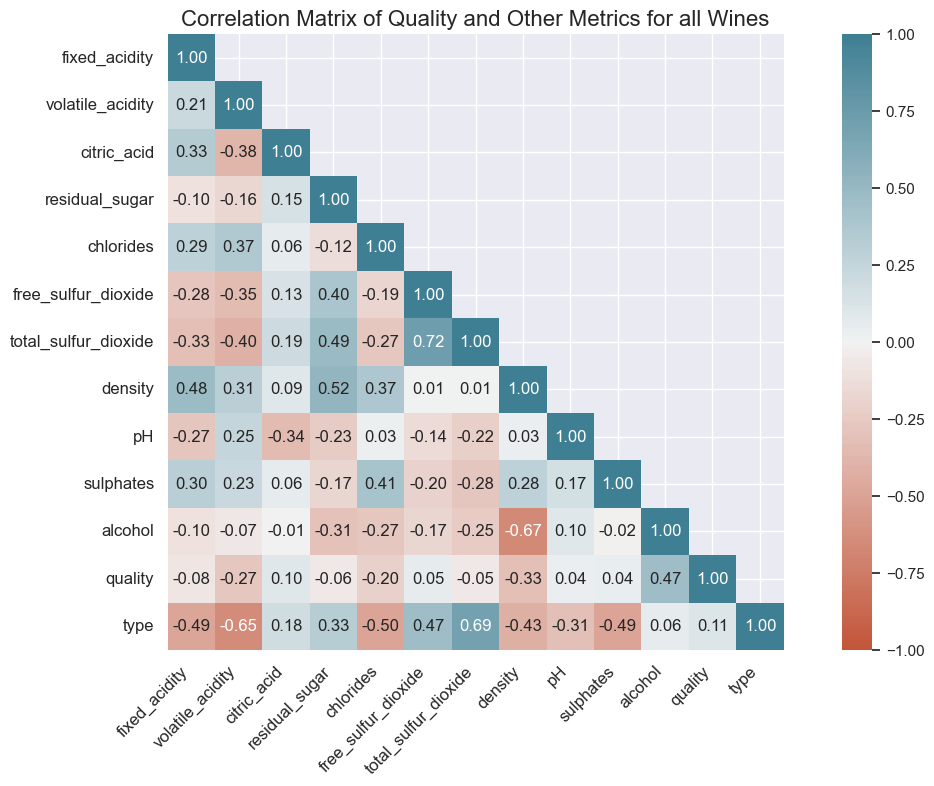

In [244]:
# create a heatmap to check relation between quality and all other metrics for all wines

# Compute the correlation matrix

corr = df_wines.corr(numeric_only=True)

# Create a mask for the upper triangle

mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set the figure size and plot the heatmap with the mask

sns.set_theme(rc={'figure.figsize': (15, 8)})
ax = sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap=sns.diverging_palette(20, 220, n=200), square=True)

# Customize the tick labels and title

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Correlation Matrix of Quality and Other Metrics for all Wines', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

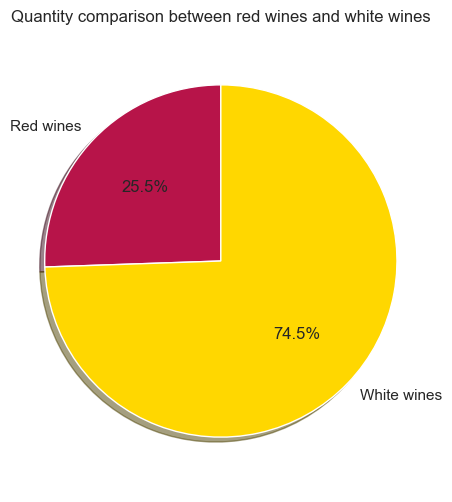

In [245]:
colors = ['#b71449', '#ffd700']
labels = ['Red wines' , 'White wines']

df_wines.groupby('type').size().plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° 
                            shadow=True,       # add shadow 
                            colors = colors,
                            labels = labels    # labeling via list
                            
                            )

plt.title('Quantity comparison between red wines and white wines')
plt.axis('equal') # Sets the pie chart to look like a circle.


plt.show()

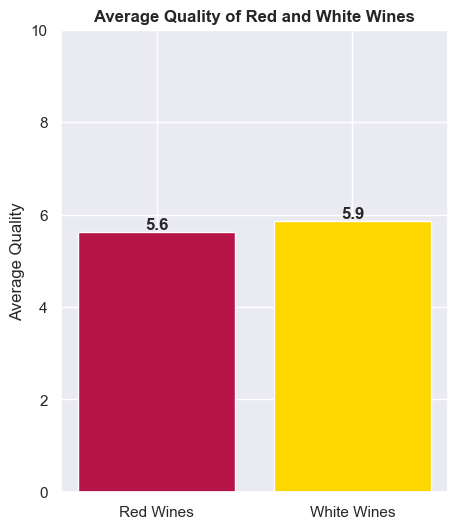

In [246]:
# Create a bar chart
average_quality = df_wines.groupby('type')['quality'].mean().reset_index()

# Now use 'average_quality' for the bar chart
plt.figure(figsize=(5, 6))

bars = plt.bar(average_quality['type'], average_quality['quality'], color=colors)

# Set title and labels
plt.title('Average Quality of Red and White Wines', fontweight='bold')

plt.ylabel('Average Quality')
plt.xticks([0, 1], ['Red Wines', 'White Wines'])

# Set y-axis limit
plt.ylim(0, 10)

# Add values above the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}', 
             ha='center', va='bottom', fontweight='bold')

# Show the plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

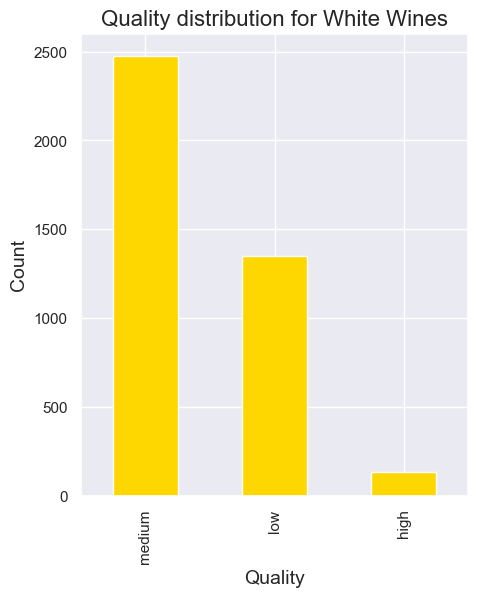

In [247]:
# create a barplot for white wines according to quality label

plt.figure(figsize=(5, 6))

df_white['quality_label'].value_counts().plot(kind='bar', color='#ffd700')

plt.ylim(0,2600)
plt.title('Quality distribution for White Wines', fontsize=16)
plt.xlabel('Quality', fontsize=14 )  # Set the x-axis label and font size
plt.ylabel('Count', fontsize=14)          # Set the y-axis label and font size
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

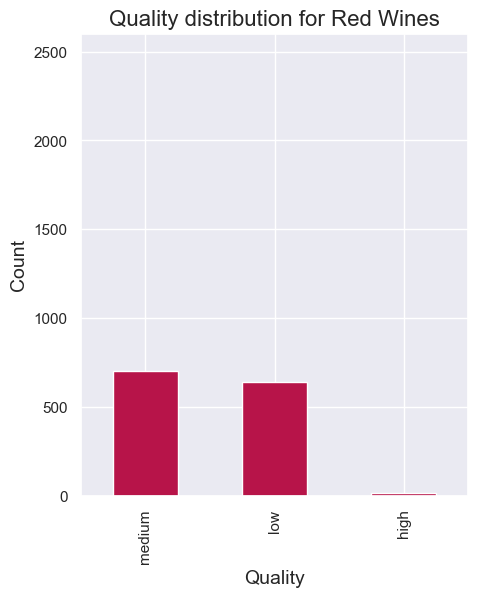

In [248]:
# create a barplot for red wines according to quality label

plt.figure(figsize=(5, 6))

df_red['quality_label'].value_counts().plot(kind='bar', color='#b71449')

plt.ylim(0,2600)
plt.title('Quality distribution for Red Wines', fontsize=16)
plt.xlabel('Quality', fontsize=14 )  # Set the x-axis label and font size
plt.ylabel('Count', fontsize=14)          # Set the y-axis label and font size
plt.show

### visualize the relation between quality and most correlated features on heat map. 

<function matplotlib.pyplot.show(close=None, block=None)>

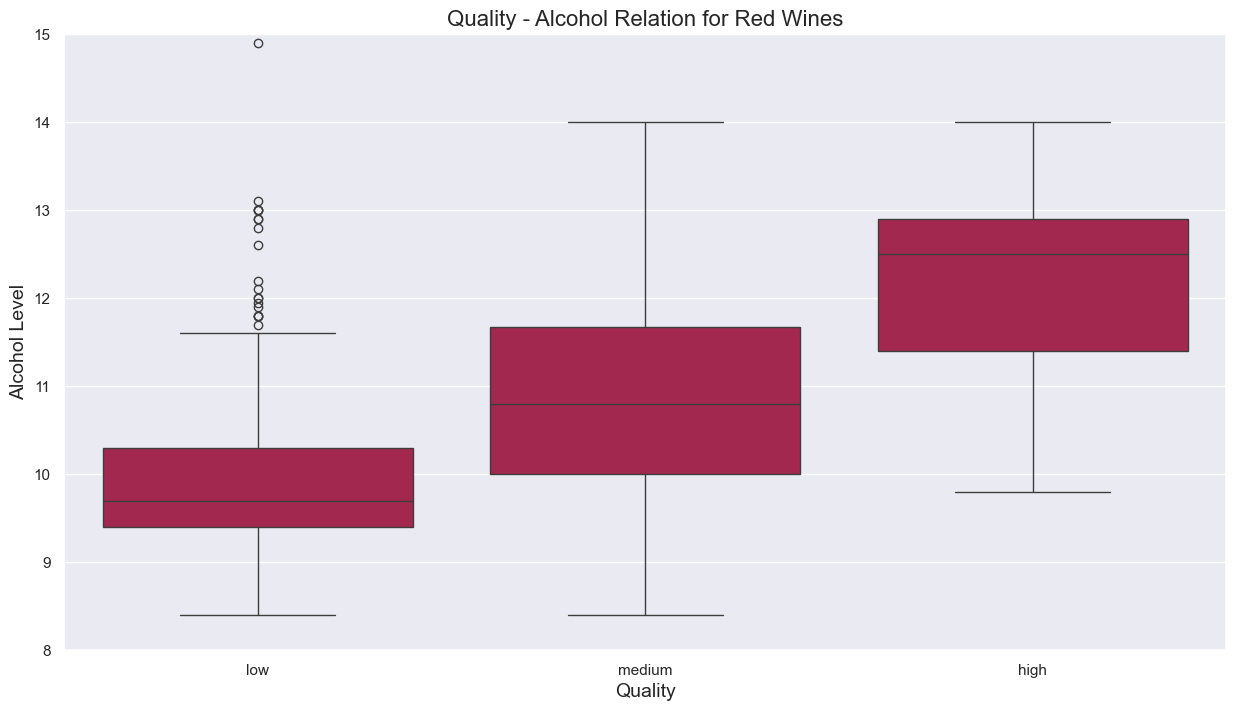

In [249]:
# create a barplot about quality label for red wines

sns.boxplot(data=df_red, x="quality_label", y="alcohol", color='#b71449')

plt.ylim(8,15)
plt.title('Quality - Alcohol Relation for Red Wines', fontsize=16)
plt.xlabel('Quality', fontsize=14)  # Set the x-axis label and font size
plt.ylabel('Alcohol Level', fontsize=14)          # Set the y-axis label and font size
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

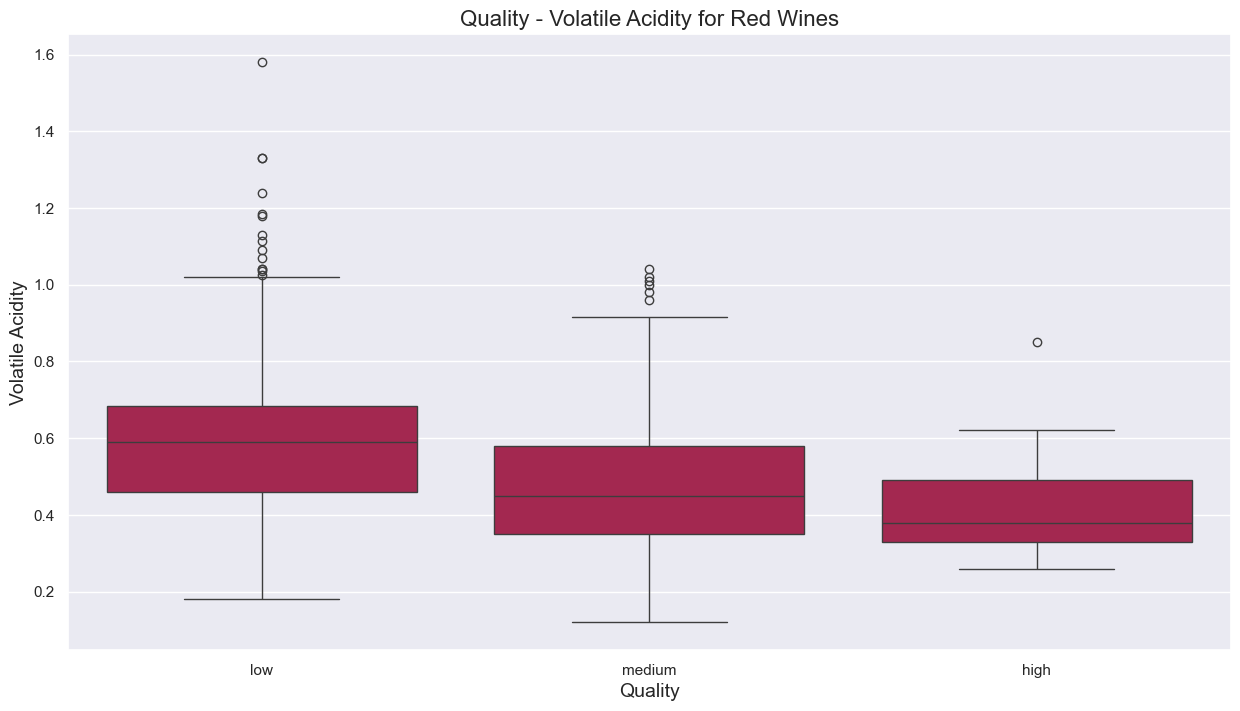

In [250]:
# create a barplot about quality label for red wines

sns.boxplot(data=df_red, x="quality_label", y="volatile_acidity", color='#b71449')

plt.title('Quality - Volatile Acidity for Red Wines', fontsize=16)
plt.xlabel('Quality', fontsize=14)  # Set the x-axis label and font size
plt.ylabel('Volatile Acidity', fontsize=14)          # Set the y-axis label and font size
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

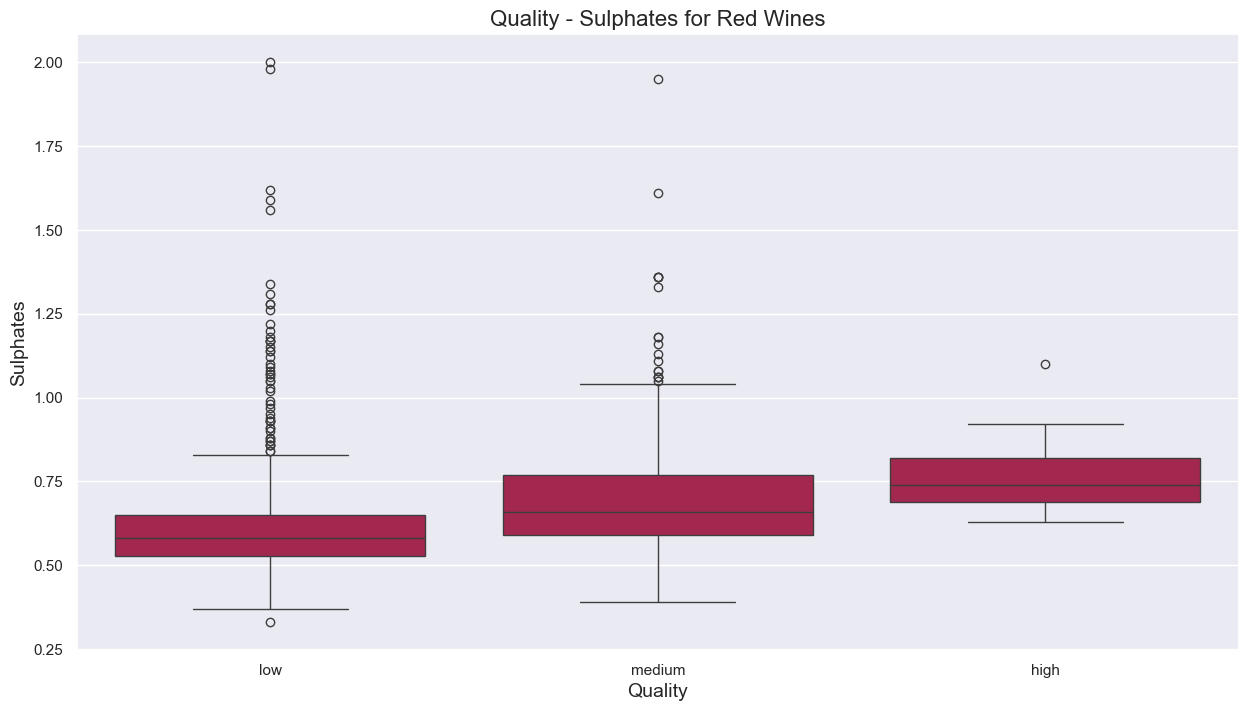

In [251]:
# create a barplot about quality label for red wines

sns.boxplot(data=df_red, x="quality_label", y="sulphates", color='#b71449')

plt.title('Quality - Sulphates for Red Wines', fontsize=16)
plt.xlabel('Quality', fontsize=14)  # Set the x-axis label and font size
plt.ylabel('Sulphates', fontsize=14)          # Set the y-axis label and font size
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

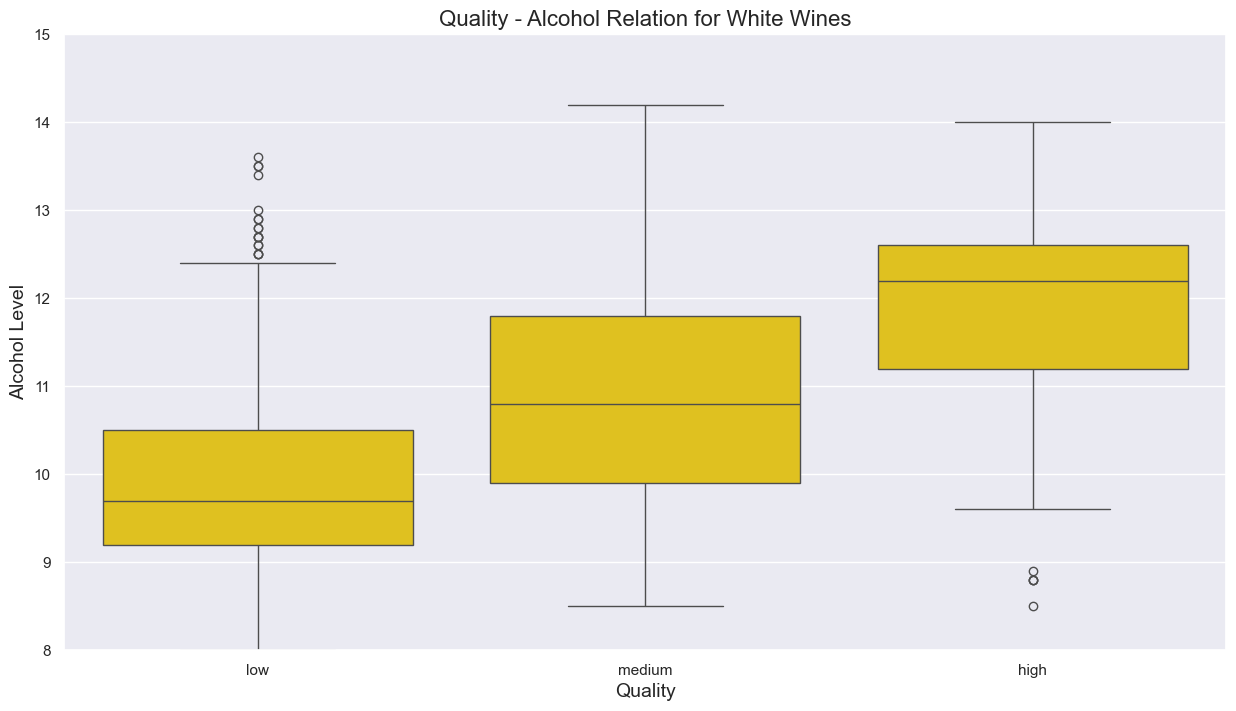

In [252]:
# create a barplot about quality label for white wines

sns.boxplot(data=df_white, x="quality_label", y="alcohol", color='#ffd700')

plt.ylim(8,15)
plt.title('Quality - Alcohol Relation for White Wines', fontsize=16)
plt.xlabel('Quality', fontsize=14)  # Set the x-axis label and font size
plt.ylabel('Alcohol Level', fontsize=14)          # Set the y-axis label and font size
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

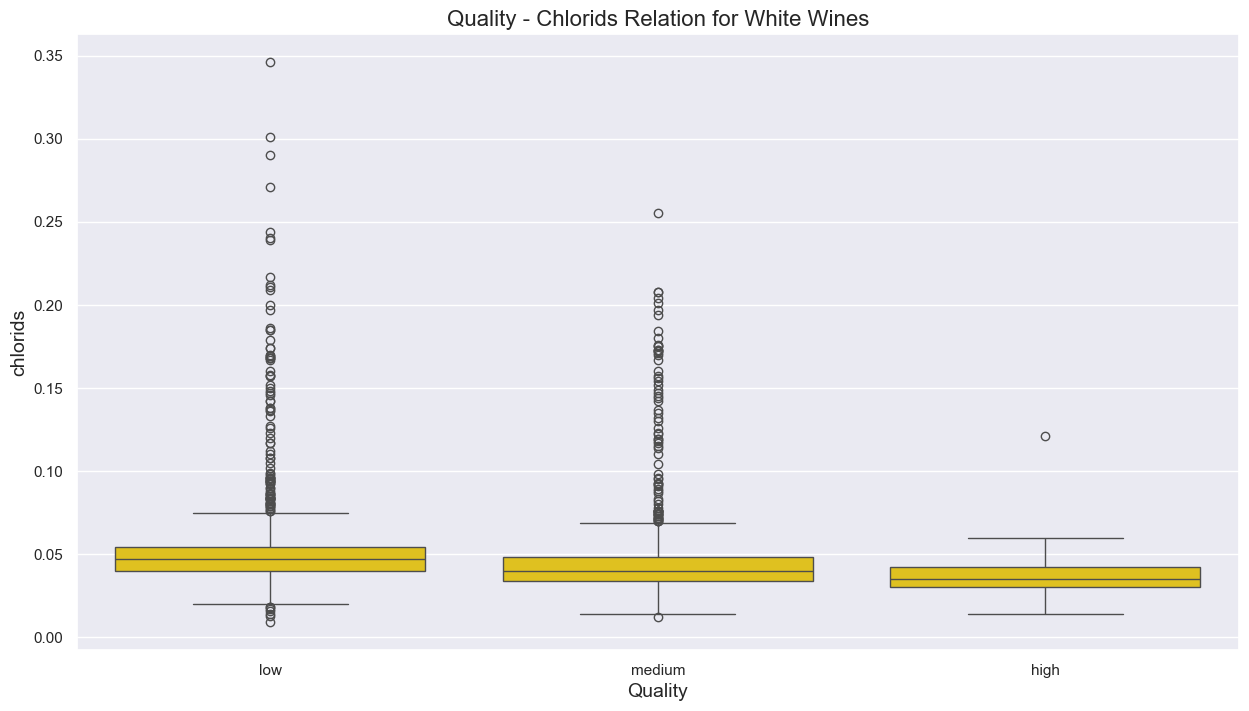

In [253]:
# create a barplot about quality label for white wines

sns.boxplot(data=df_white, x="quality_label", y="chlorides", color='#ffd700')

plt.title('Quality - Chlorids Relation for White Wines', fontsize=16)
plt.xlabel('Quality', fontsize=14)  # Set the x-axis label and font size
plt.ylabel('chlorids', fontsize=14)          # Set the y-axis label and font size
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

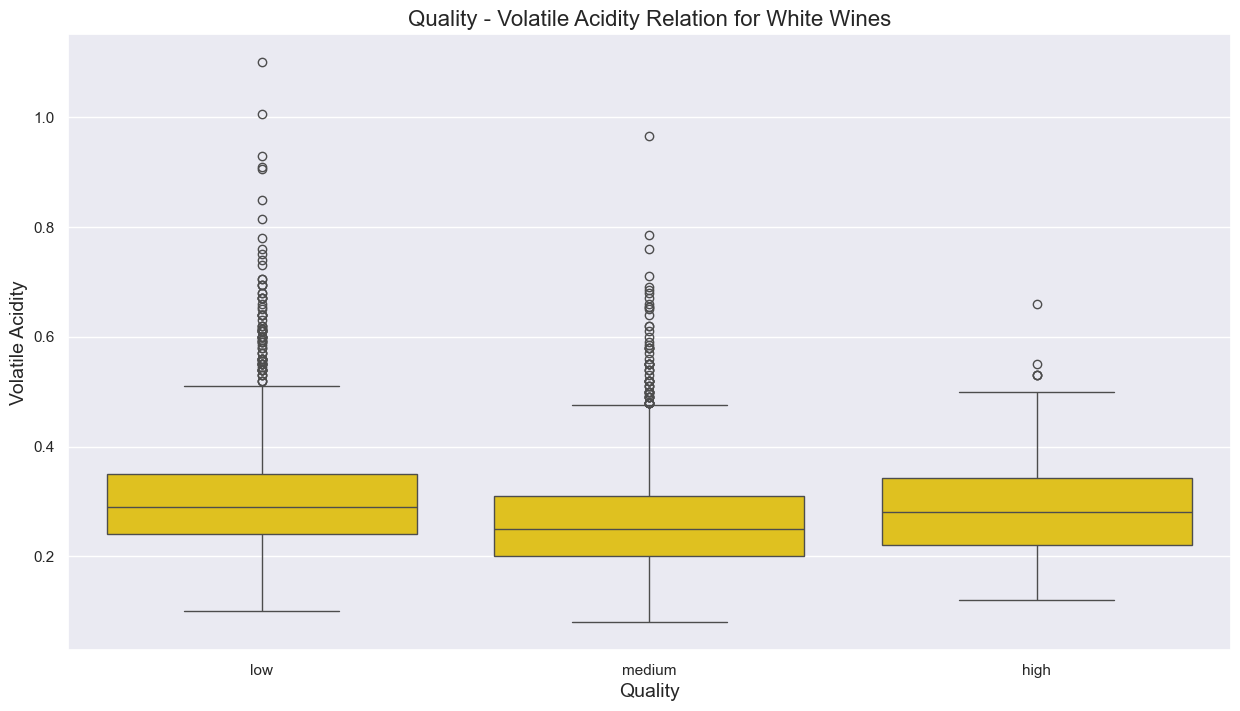

In [254]:
# create a barplot about quality label for white wines

sns.boxplot(data=df_white, x="quality_label", y="volatile_acidity", color='#ffd700')

plt.title('Quality - Volatile Acidity Relation for White Wines', fontsize=16)
plt.xlabel('Quality', fontsize=14)  # Set the x-axis label and font size
plt.ylabel('Volatile Acidity', fontsize=14)          # Set the y-axis label and font size
plt.show

* Features with the highest correlation with quality for red wines: alcohol, volatile acidity, sulphates, and citric acid.
* Features with the highest correlation with quality for white wines: alcohol, density, chlorides and volatile acidity.
* As alcohol and density are highly correlated within each other, we will not use both features toget for Ml model but will chooose the higher one alcohol.  
* For all wines combined: total sulfur dioxide, volatile acidity, chlorides, and sulphates.

#### The type of wine plays a significant role in determining which features are more correlated with quality.
### In this situation it may be better to build a Supervised Machine Learning model separately for each wine type.

### plot outliers of all features. 

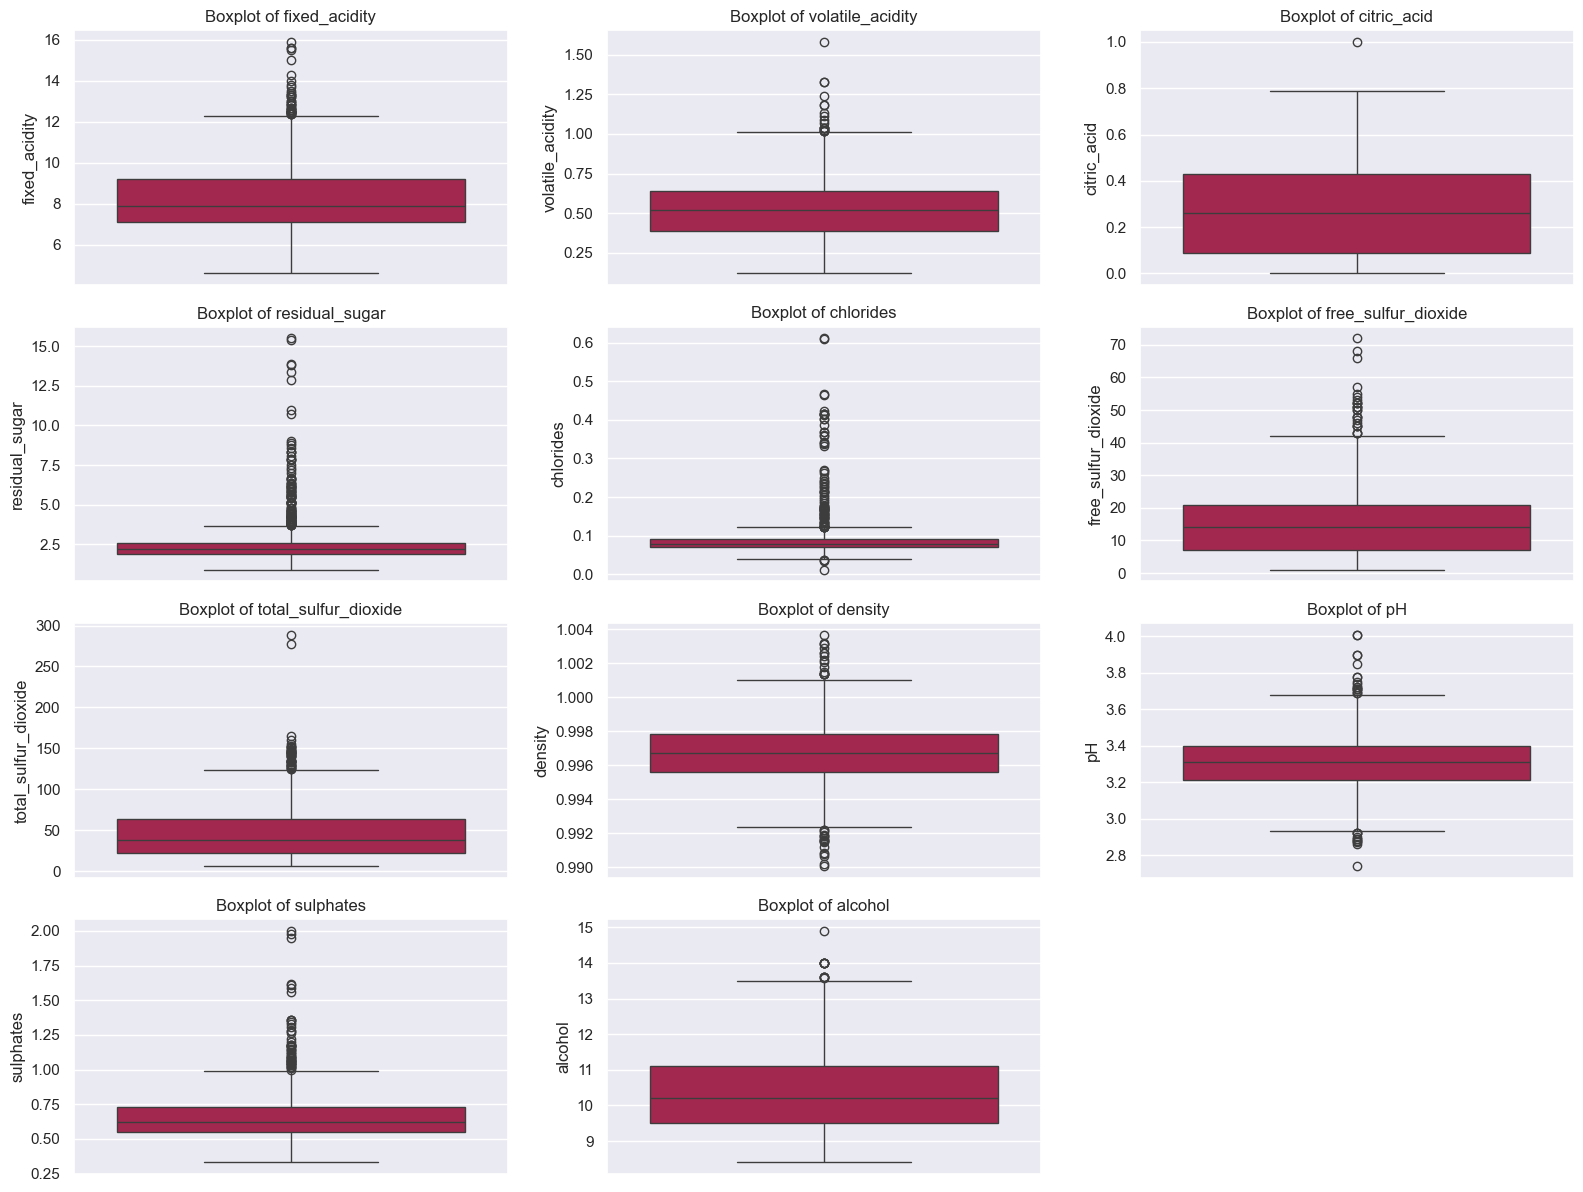

In [255]:
# List of numerical features

features = [
    'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
    'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'
]

# Boxplot Visualization for each feature

plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df_red[feature], color='#b71449')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

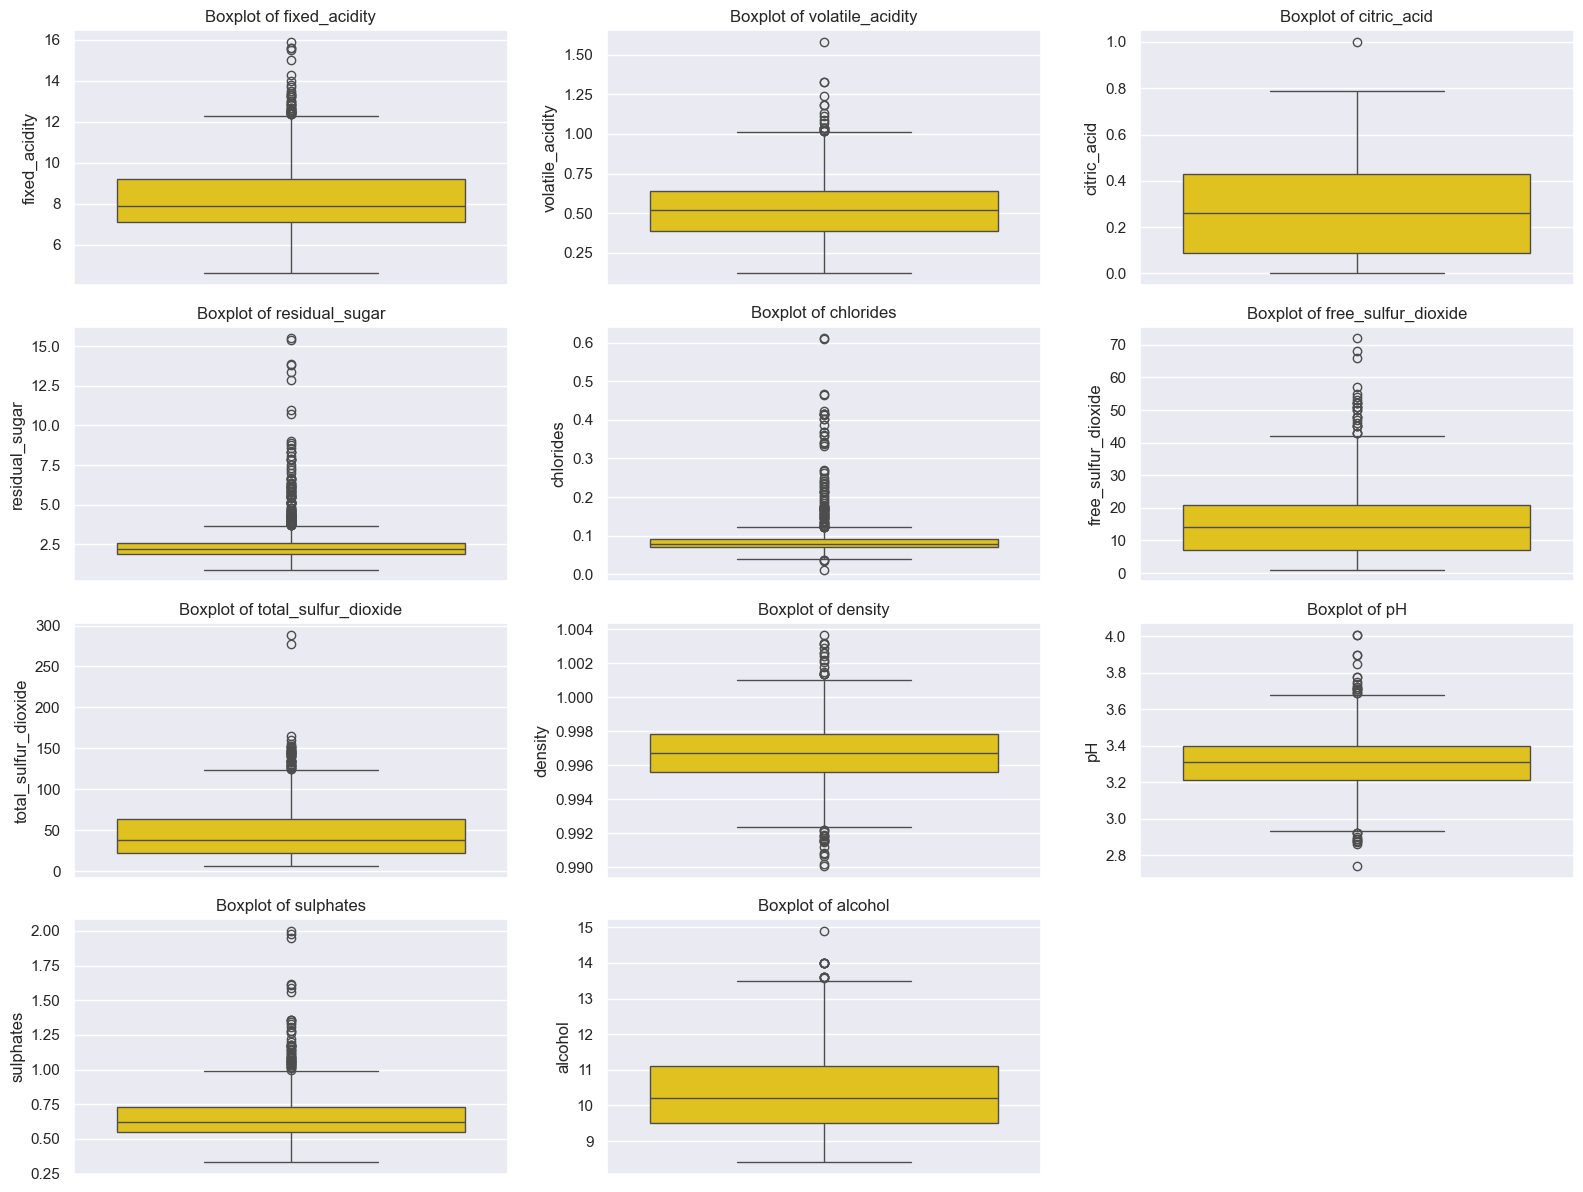

In [256]:
# List of numerical features

features = [
    'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
    'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'
]

# Boxplot Visualization for each feature

plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df_red[feature], color='#ffd700')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [257]:
# calculate skewness and kurtosis

from scipy.stats import skew, kurtosis

# Define selected features for red and white wines
features_red = ['alcohol', 'volatile_acidity', 'sulphates', 'citric_acid']
features_white = ['alcohol', 'chlorides', 'volatile_acidity']

def calculate_skewness_kurtosis(df):
    skewness = df.apply(lambda x: skew(x.dropna()))
    kurtosis_values = df.apply(lambda x: kurtosis(x.dropna()))
    
    return pd.DataFrame({
        'Feature': df.columns,
        'Skewness': skewness,
        'Kurtosis': kurtosis_values
    })

# Example for your datasets
skewness_kurtosis_red = calculate_skewness_kurtosis(df_red[features_red])
skewness_kurtosis_white = calculate_skewness_kurtosis(df_white[features_white])

skewness_kurtosis_red

,Feature,Skewness,Kurtosis
alcohol,alcohol,0.858892,0.154740
volatile_acidity,volatile_acidity,0.728474,1.240240
sulphates,sulphates,2.403848,11.057065
citric_acid,citric_acid,0.312380,-0.790433


In [258]:
skewness_kurtosis_white

,Feature,Skewness,Kurtosis
alcohol,alcohol,0.450526,-0.696616
chlorides,chlorides,4.967194,35.483939
volatile_acidity,volatile_acidity,1.640459,5.319517


### Even though there are outliers, noticeable skewness, and high kurtosis in some features, we will keep the outliers in the dataset because they represent real differences in chemical properties that could be important for predicting wine quality.

### visualize distributions of data values for all features

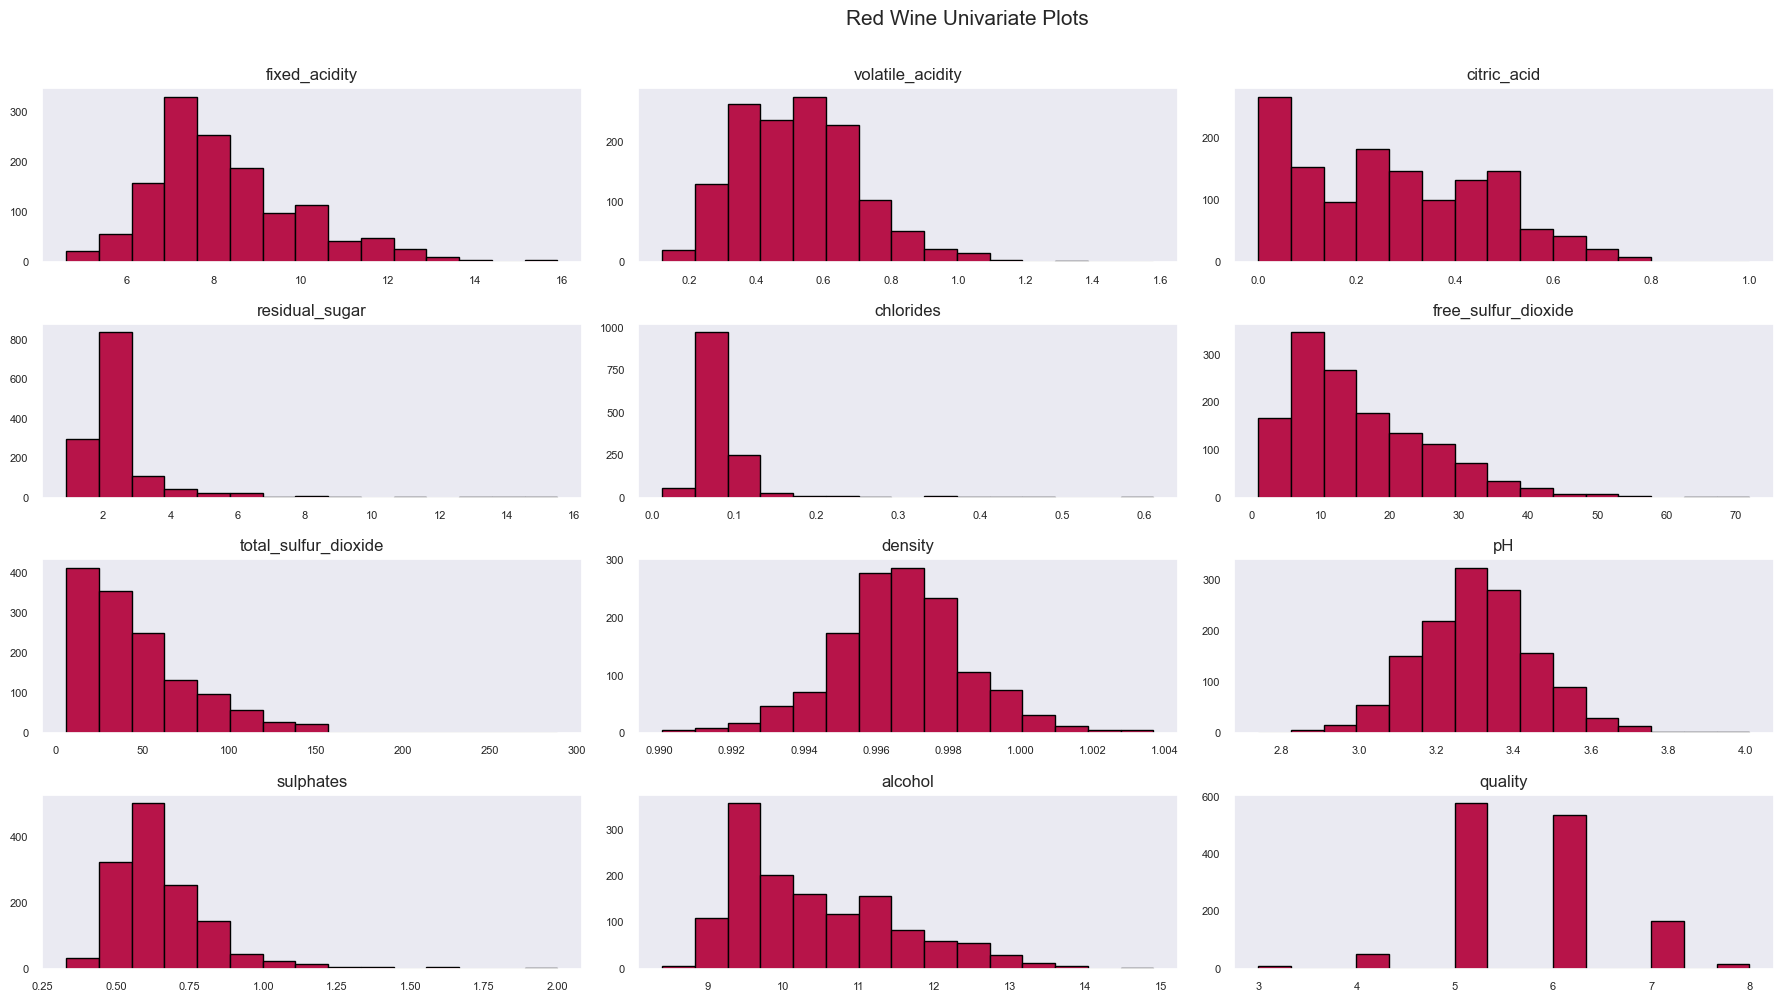

In [259]:
df_red.hist(bins=15, color='#b71449', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

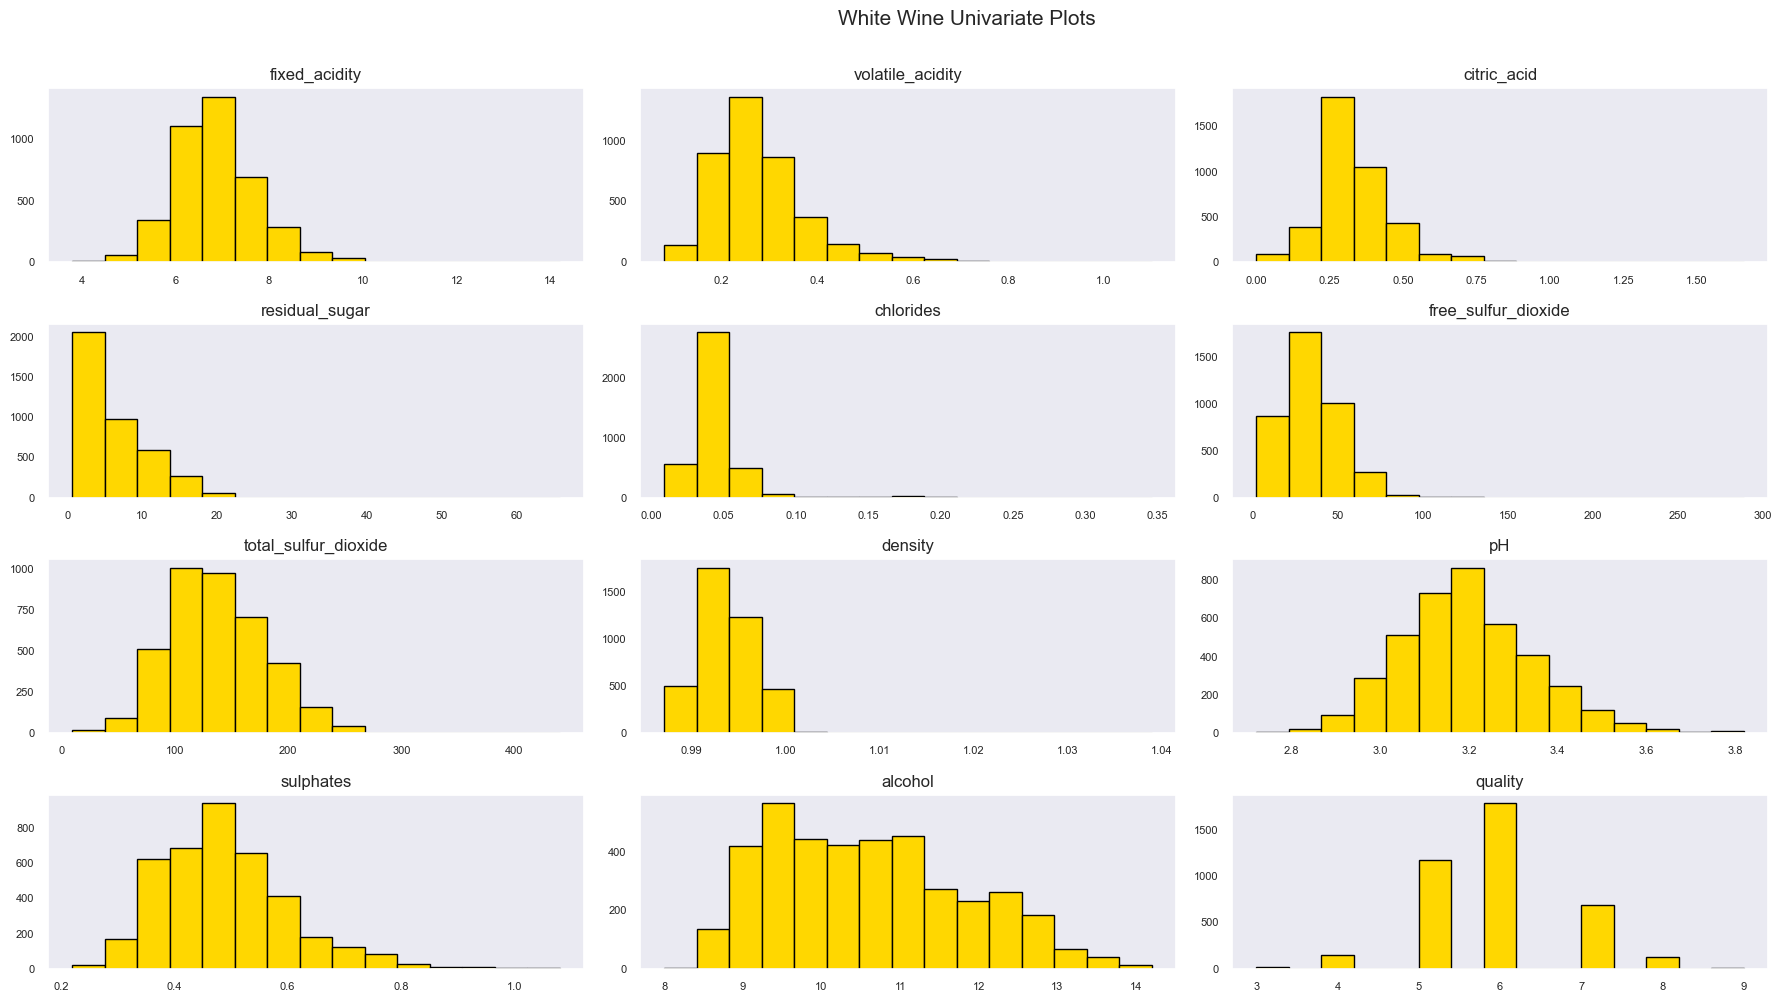

In [260]:
df_white.hist(bins=15, color='#ffd700', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

### The distribution of data values also supports our decisions regarding which features to use for the ML model.
### Alcohol appears to have the strongest impact on quality for both wine types in our dataset, though the influence of other features may vary. Listed below are the features in descending order of correlation:
### For red wines: alcohol, volatile_acidity, sulphates, citric_acid
### For white wines: alcohol, chlorids, volatile_acidity
### Since two features (alcohol and volatile acidity) are common between the wine types, we can run our ML model for all wines together using these features and compare the results with those calculated separately by wine type in next steps.

In [261]:
from sklearn.feature_selection import f_classif

# Features for each type of wine
features_red = ['alcohol', 'volatile_acidity', 'sulphates', 'citric_acid']
features_white = ['alcohol', 'chlorides', 'volatile_acidity']

# Extract features and target from the DataFrames
X_red = df_red[features_red]
y_red = df_red['quality_label']  

X_white = df_white[features_white]
y_white = df_white['quality_label']  



In [262]:
# Perform ANOVA for red wines

f_values_red, p_values_red = f_classif(X_red, y_red)
anova_results_red = pd.DataFrame({
    'Feature': features_red,
    'F-Value': f_values_red,
    'P-Value': p_values_red
}).sort_values(by='P-Value')

print("ANOVA Results for Red Wines:")
anova_results_red

ANOVA Results for Red Wines:


,Feature,F-Value,P-Value
0,alcohol,187.644073,1.141949e-72
1,volatile_acidity,81.956326,2.506330e-34
2,sulphates,33.910854,4.257609e-15
3,citric_acid,21.198716,8.600239e-10


* All Features are Statistically Significant: All the p-values are extremely small (much less than 0.05)
* Alcohol: Has the highest F-value and the smallest p-value, indicating it has the strongest impact on wine quality among the features.
* Volatile Acidity: Also has a very high F-value and a small p-value, making it an important feature as well.
* Sulphates and Citric Acid: Both features are significant with lower F-values compared to alcohol and volatile acidity, but still provide valuable information.
* We will include all these features in our classification model

In [263]:
# Perform ANOVA for white wines
f_values_white, p_values_white = f_classif(X_white, y_white)
anova_results_white = pd.DataFrame({
    'Feature': features_white,
    'F-Value': f_values_white,
    'P-Value': p_values_white
}).sort_values(by='P-Value')

print("\nANOVA Results for White Wines:")
anova_results_white


ANOVA Results for White Wines:


,Feature,F-Value,P-Value
0,alcohol,444.121330,9.722633e-175
2,volatile_acidity,107.939581,2.270817e-46
1,chlorides,81.892677,1.414612e-35


* All Features are Statistically Significant
* Alcohol: Has the highest F-value and an extremely small p-value same like white wines. 
* Volatile Acidity: Also has a high F-value and a very small p-value, making it another important feature.
* Chlorides: Though it has a slightly lower F-value compared to others, it may be meaningfully to the model.


## 3: Building and Evaluating Supervised Classification Models<a id="3"></a>

#### 1: Logistic Regression

In [264]:
# Libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Red wines data and features

features_red = ['alcohol', 'volatile_acidity', 'sulphates', 'citric_acid']  
X_red = df_red[features_red]
y_red = df_red['quality_label']  

# Step 1: Split red wine data into training and test sets

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.3, random_state=42)

# Step 2: Feature scaling for red wines (Standardizing the data)

scaler_red = StandardScaler()
X_train_red_scaled = scaler_red.fit_transform(X_train_red)
X_test_red_scaled = scaler_red.transform(X_test_red)

# Step 3: Fit the Logistic Regression model for red wines

log_reg_red = LogisticRegression()
log_reg_red.fit(X_train_red_scaled, y_train_red)

# Step 4: Predict and Evaluate the model for red wines
y_pred_red = log_reg_red.predict(X_test_red_scaled)

# Evaluation Metrics for Red Wines
print("Red Wines - Accuracy:", accuracy_score(y_test_red, y_pred_red))
print("Red Wines - Confusion Matrix:\n", confusion_matrix(y_test_red, y_pred_red))
print("Red Wines - Classification Report:\n", classification_report(y_test_red, y_pred_red))


Red Wines - Accuracy: 0.75
Red Wines - Confusion Matrix:
 [[  0   0   4]
 [  0 147  43]
 [  0  55 159]]
Red Wines - Classification Report:
               precision    recall  f1-score   support

        high       0.00      0.00      0.00         4
         low       0.73      0.77      0.75       190
      medium       0.77      0.74      0.76       214

    accuracy                           0.75       408
   macro avg       0.50      0.51      0.50       408
weighted avg       0.74      0.75      0.75       408



c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\miniconda3\envs\python38_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### The model performs reasonably well for predicting low and medium-quality wines(0.75 , 0.76). High-quality wines are not well predicted since there are only 4 records in data. 

#### 2: Decision Tree

In [265]:
# Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Red wines data and features
features_red = ['alcohol', 'volatile_acidity', 'sulphates', 'citric_acid']  
X_red = df_red[features_red]
y_red = df_red['quality_label']  

# Step 1: Split red wine data into training and test sets
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.3, random_state=42)

# Step 2: Feature scaling for red wines (Standardizing the data)
scaler_red = StandardScaler()
X_train_red_scaled = scaler_red.fit_transform(X_train_red)
X_test_red_scaled = scaler_red.transform(X_test_red)

# Step 3: Fit the Decision Tree model for red wines
decision_tree_red = DecisionTreeClassifier(random_state=42)  # Initialize the Decision Tree classifier
decision_tree_red.fit(X_train_red_scaled, y_train_red)  # Fit the model to the training data

# Step 4: Predict and Evaluate the model for red wines
y_pred_red = decision_tree_red.predict(X_test_red_scaled)

# Evaluation Metrics for Red Wines
print("Red Wines - Accuracy:", accuracy_score(y_test_red, y_pred_red))
print("Red Wines - Confusion Matrix:\n", confusion_matrix(y_test_red, y_pred_red))
print("Red Wines - Classification Report:\n", classification_report(y_test_red, y_pred_red))


Red Wines - Accuracy: 0.6323529411764706
Red Wines - Confusion Matrix:
 [[  0   2   2]
 [  1 114  75]
 [  6  64 144]]
Red Wines - Classification Report:
               precision    recall  f1-score   support

        high       0.00      0.00      0.00         4
         low       0.63      0.60      0.62       190
      medium       0.65      0.67      0.66       214

    accuracy                           0.63       408
   macro avg       0.43      0.42      0.43       408
weighted avg       0.64      0.63      0.63       408



#### Decision Tree model has an accuracy of approximately 63% and struggled to correctly predict the "high" quality class.

#### 3: Random Forest

In [266]:
# Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  # Importing Random Forest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Red wines data and features
features_red = ['alcohol', 'volatile_acidity', 'sulphates', 'citric_acid']  
X_red = df_red[features_red]
y_red = df_red['quality_label']  

# Step 1: Split red wine data into training and test sets
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.3, random_state=42)

# Step 2: Feature scaling for red wines (Standardizing the data)
scaler_red = StandardScaler()
X_train_red_scaled = scaler_red.fit_transform(X_train_red)
X_test_red_scaled = scaler_red.transform(X_test_red)

# Step 3: Fit the Random Forest model for red wines
random_forest_red = RandomForestClassifier(random_state=42)  # Initialize the Random Forest classifier
random_forest_red.fit(X_train_red_scaled, y_train_red)  # Fit the model to the training data

# Step 4: Predict and Evaluate the model for red wines
y_pred_red = random_forest_red.predict(X_test_red_scaled)

# Evaluation Metrics for Red Wines
print("Red Wines - Accuracy:", accuracy_score(y_test_red, y_pred_red))
print("Red Wines - Confusion Matrix:\n", confusion_matrix(y_test_red, y_pred_red))
print("Red Wines - Classification Report:\n", classification_report(y_test_red, y_pred_red))


Red Wines - Accuracy: 0.7303921568627451
Red Wines - Confusion Matrix:
 [[  0   0   4]
 [  0 138  52]
 [  1  53 160]]
Red Wines - Classification Report:
               precision    recall  f1-score   support

        high       0.00      0.00      0.00         4
         low       0.72      0.73      0.72       190
      medium       0.74      0.75      0.74       214

    accuracy                           0.73       408
   macro avg       0.49      0.49      0.49       408
weighted avg       0.72      0.73      0.73       408



#### The Random Forest model achieved an accuracy of approximately 73%, slightly lower than the Logistic Regression accuracy of 75% but better than the Decision Tree accuracy of 63%, and still struggling with the "high" quality class prediction.

#### test and get results for white wines by using same 3 models